In [1]:
from __future__ import division
%pylab inline

import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = '/home/ubuntu/data/models_SfMLearner/model-190532'
#ckpt_file = '../models_SfMLearner/model-190532'
#fh = 'misc/sample.png'
fh='/home/ubuntu/data/raw_data_KITTI/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000069.png'
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/ubuntu/data/models_SfMLearner/model-190532


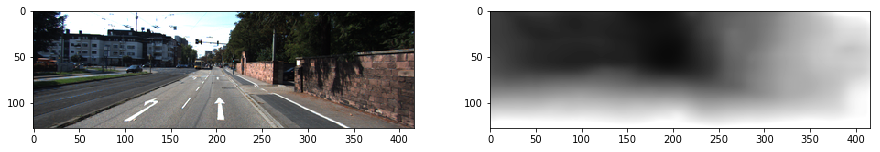

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

In [5]:
print(pred['depth'][0,:,:,0])

[[8.817828  8.837151  8.916618  ... 1.8876517 1.8808713 1.8816719]
 [8.812502  8.806304  8.887239  ... 1.9005524 1.8862627 1.8884208]
 [8.765402  8.783092  8.862944  ... 1.9226903 1.9116967 1.9113373]
 ...
 [1.9991769 1.9952894 1.990393  ... 1.8319293 1.8133763 1.8104088]
 [1.9804264 1.9752432 1.9696245 ... 1.8135959 1.7933301 1.7931576]
 [1.9626063 1.9542438 1.9475956 ... 1.7954757 1.7775842 1.7800974]]


In [6]:
pred['depth'][0,:,:,0].size

53248

In [7]:
from kitti_eval.depth_evaluation_utils import *

In [8]:
depth_map_dir='/home/ubuntu/data/dfv_KITTI_depth_result_20200414/'
test_file_list='./data/kitti/test_files_eigen.txt'
test_files = read_text_lines(test_file_list)

kitti_dir='/home/ubuntu/data/raw_data_KITTI/'

pred_file2="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result2.npy"
#result2 is KITTI + Cityscapes trained

#disp_map=np.load(depth_map_dir )
#future

In [9]:
pred_depths2 = np.load(pred_file2)

In [10]:
pred_depths2[0].shape

(128, 416, 1)

In [11]:
pred_depths2[0]

array([[[8.611643 ],
        [8.638459 ],
        [8.641462 ],
        ...,
        [4.933108 ],
        [4.7620277],
        [4.888956 ]],

       [[8.574201 ],
        [8.620672 ],
        [8.646226 ],
        ...,
        [4.725038 ],
        [4.7442822],
        [4.626306 ]],

       [[8.591261 ],
        [8.645325 ],
        [8.651073 ],
        ...,
        [4.7948203],
        [4.691023 ],
        [4.6347575]],

       ...,

       [[3.612707 ],
        [3.606479 ],
        [3.6052575],
        ...,
        [3.8301535],
        [3.8720756],
        [3.8343325]],

       [[3.5709698],
        [3.576166 ],
        [3.5743709],
        ...,
        [3.6449797],
        [3.6815686],
        [3.6354766]],

       [[3.570947 ],
        [3.5664136],
        [3.550115 ],
        ...,
        [3.7432911],
        [3.6690974],
        [3.7013788]]], dtype=float32)

In [12]:
#pred_file="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result.npy"
#pred_file="/home/ubuntu/data/SfMLearner_result_20200413/model-190532.npy"
pred_file="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result2.npy"

In [13]:
pred_depths = np.load(pred_file)

In [14]:
pred_depths=pred_depths.reshape(697, 128, 416)
#size is same

In [15]:
pred_depths[0]

array([[8.611643 , 8.638459 , 8.641462 , ..., 4.933108 , 4.7620277,
        4.888956 ],
       [8.574201 , 8.620672 , 8.646226 , ..., 4.725038 , 4.7442822,
        4.626306 ],
       [8.591261 , 8.645325 , 8.651073 , ..., 4.7948203, 4.691023 ,
        4.6347575],
       ...,
       [3.612707 , 3.606479 , 3.6052575, ..., 3.8301535, 3.8720756,
        3.8343325],
       [3.5709698, 3.576166 , 3.5743709, ..., 3.6449797, 3.6815686,
        3.6354766],
       [3.570947 , 3.5664136, 3.550115 , ..., 3.7432911, 3.6690974,
        3.7013788]], dtype=float32)

In [16]:
pred_depths[0].shape

(128, 416)

In [17]:
correlation = numpy.corrcoef(pred_depths.reshape(-1,), pred_depths2.reshape(-1,))

In [18]:
correlation

array([[1., 1.],
       [1., 1.]])

In [19]:
gt_files, gt_calib, im_sizes, im_files, cams = read_file_data(test_files, kitti_dir)

In [20]:
I = pil.open(im_files[0])
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

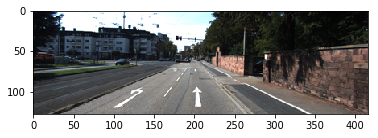

In [21]:
imshow(I)

In [22]:
gt_files[0]

'/home/ubuntu/data/raw_data_KITTI/2011_09_26/2011_09_26_drive_0002_sync/velodyne_points/data/0000000069.bin'

In [23]:
im_sizes[0]

(375, 1242)

In [24]:
num_test = len(im_files)

In [25]:
gt_depths = []
pred_depths_resized = []

In [26]:
for t_id in range(num_test):
    print(t_id)
    camera_id = cams[t_id]  # 2 is left, 3 is right
    pred_depths_resized.append(cv2.resize(pred_depths[t_id], (im_sizes[t_id][1], im_sizes[t_id][0]),interpolation=cv2.INTER_LINEAR))
    depth = generate_depth_map(gt_calib[t_id],gt_files[t_id],im_sizes[t_id],camera_id, False,True)
    gt_depths.append(depth.astype(np.float32))

0
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
1
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
2
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
3
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
4
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
5
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
6
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
7
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902

63
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
64
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
65
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
66
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
67
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
68
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
69
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
70
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -

125
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
126
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
127
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
128
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
129
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
130
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
131
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
132
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

191
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
192
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
193
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
194
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
195
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
196
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
197
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
198
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

254
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
255
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
256
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
257
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
258
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
259
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
260
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
261
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

318
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
319
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
320
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
321
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
322
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
323
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
324
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
325
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

380
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
381
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
382
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
383
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
384
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
385
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
386
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
387
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

445
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
446
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
447
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
448
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
449
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
450
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
451
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
452
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

509
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
510
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
511
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
512
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
513
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
514
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
515
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
516
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

578
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
579
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
580
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
581
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
582
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
583
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
584
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
585
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.18431

646
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
647
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
648
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
649
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
650
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
651
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
652
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
653
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.24171

In [27]:
pred_depths = pred_depths_resized

In [28]:
i=0

In [29]:
gt_depth = gt_depths[i]
pred_depth = np.copy(pred_depths[i])

In [30]:
gt_depth

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 5.752, 0.   , 5.741]], dtype=float32)

In [31]:
#pred_depth[0]

In [32]:
min_depth=1e-3
max_depth=80

In [33]:
mask = np.logical_and(gt_depth > min_depth,gt_depth < max_depth)

In [34]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

In [35]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)

In [36]:
gt_height, gt_width = gt_depth.shape

In [37]:
crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)
crop_mask = np.zeros(mask.shape)




In [38]:
crop_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1


In [40]:
mask = np.logical_and(mask, crop_mask)

In [41]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [42]:
# Scale matching
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
pred_depth[mask] *= scalor
# Why?

pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [43]:
for i in range(num_test):    
        gt_depth = gt_depths[i]
        pred_depth = np.copy(pred_depths[i])

        mask = np.logical_and(gt_depth > min_depth, 
                              gt_depth < max_depth)
        # crop used by Garg ECCV16 to reprocude Eigen NIPS14 results
        # if used on gt_size 370x1224 produces a crop of [-218, -3, 44, 1180]
        gt_height, gt_width = gt_depth.shape
        crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,   
                         0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)

        crop_mask = np.zeros(mask.shape)
        crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1
        mask = np.logical_and(mask, crop_mask)

        # Scale matching
        scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
        pred_depth[mask] *= 1

        pred_depth[pred_depth < min_depth] = min_depth
        pred_depth[pred_depth > max_depth] = max_depth
        abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
            compute_errors(gt_depth[mask], pred_depth[mask])

In [44]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean()))

   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3
    0.4977,     6.2456,    13.9982,     0.8304,     0.0000,     0.0384,     0.1807,     0.5050


In [45]:
abs_rel

array([0.5396901 , 0.5328726 , 0.52511525, 0.5356989 , 0.53785294,
       0.55458474, 0.54714864, 0.5547282 , 0.5294115 , 0.5473257 ,
       0.53522813, 0.5429381 , 0.55037934, 0.5304757 , 0.56173384,
       0.55022335, 0.5455296 , 0.5329577 , 0.5658211 , 0.5305923 ,
       0.53178227, 0.5361213 , 0.5326981 , 0.55671924, 0.54209965,
       0.5433725 , 0.5438587 , 0.5344611 , 0.50986207, 0.507163  ,
       0.51870733, 0.5315713 , 0.50568825, 0.5074052 , 0.5244909 ,
       0.54221034, 0.5571245 , 0.54973394, 0.55720735, 0.4982483 ,
       0.5875587 , 0.5651593 , 0.53428066, 0.5533955 , 0.5167017 ,
       0.5274556 , 0.51042557, 0.5532003 , 0.55068684, 0.5619505 ,
       0.5139932 , 0.5408049 , 0.44328848, 0.44880754, 0.5431617 ,
       0.46202108, 0.4658649 , 0.51946294, 0.46495944, 0.49428245,
       0.48811322, 0.49977648, 0.5227549 , 0.51581144, 0.45613542,
       0.48557526, 0.52105004, 0.54294264, 0.53301245, 0.5001488 ,
       0.5394245 , 0.5324265 , 0.42959648, 0.5368627 , 0.53924

In [46]:
len(abs_rel)

697

In [47]:
np.set_printoptions(threshold=1000)

In [48]:
abs_rel_SfM

NameError: name 'abs_rel_SfM' is not defined

In [ ]:
#abs_rel_SfM=abs_rel

In [ ]:
#abs_rel_KITTI=abs_rel

In [ ]:
#abs_rel_KITTIandCityscapes=abs_rel

In [ ]:
results=np.array([abs_rel_SfM,abs_rel_KITTI,abs_rel_KITTIandCityscapes])

In [ ]:
results.shape

In [ ]:
numpy.corrcoef(results)